<a href="https://colab.research.google.com/github/anwishn/ESAA_OB_23-1/blob/main/OB_3%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pycaret으로 Regression 회귀 예측 해보기**

참고자료
- https://dsbook.tistory.com/360
- https://pycaret.readthedocs.io/en/latest/index.html

In [ ]:
# 기본 모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
data=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

# **pycaret**

###**pycaret이란?**

Pycaret은 Machine Learning Workflow르 자동화하는 오픈소스 라이브러리로 sciket-learn 패키지를 기반으로 자동으로 머신러닝 모델을 만들어 주는 파이썬 라이브러리로 손쉽게 모든 모델을 비교하고 하이퍼파라미터 튜닝을 할 수 있다.

###**Models**

Pycaret에서는 25가지 Regressor를 제공하고 models( ) 메서드로 확인할 수 있다. Linear Regressor, Tree Regressor, Ensemble Regressor 등의 모델이 존재한다.

#pycaret install, import

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.regression import *

In [ ]:
from pycaret.classification import *

### **setup( )**

**파라미터**
- data: input data를 입력, train과 test를 분리하지 않고 입력하면 train_size로 입력한 비율대로 분리. 만약 train과 test를 별도로 입력하려면 data에는 train data를 넣고 test_data 파라미터에 test data를 넣어주면 된다.
- target: 어떤 column이 최종적으로 예측해야하는 Column인지 지정 ( 이때 data에 target값을 포함하고 있어야 한다. )
- session_id: random seed를 설정해주는 부분
- normalize: 데이터에 정규화를 할 것인지 선택 True/False
- fold: 교차 검증 횟수 설정 (default=10)

In [ ]:
pycaret = setup(data=data,
                target='charges',
                train_size= 0.8,
                fold=5)

,Description,Value
0,Session id,8599
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 12)"
4,Transformed data shape,"(1338, 12)"
5,Transformed train set shape,"(1070, 12)"
6,Transformed test set shape,"(268, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


###**models()**
- setup() 함수를 실행한 이후에는 어떤 모델을 사용할 수 있는지 확인할 수 있음
- setup() 함수를 실행하지 않으면 호출 불가

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


###**compare_models()**
- models()에서 제공하는 모델이나 sk-learn에서 제공하는 모델을 별도로 선언한 후, 입력한 모델들의 성능을 Data Frame 형태로 제공

**파라미터**
- n_select: 가장 좋은 성능을 보였던 순서대로 모델을 설정해준 수만큼 저장
  - 설정하지 않으면 가장 좋은 알고리즘의 파라미터 저장
- sort: Soting의 기준: MAE MSE RMSE R2 Train time 등
- include: 어떤 모델들을 비교할지 설정해주는 함수로, 리스트 형식으로 입력


In [ ]:
best=compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2524.3565,21105593.6116,4548.3079,0.8557,0.4329,0.3034,0.2280
rf,Random Forest Regressor,2697.7794,23240106.1368,4787.9080,0.8416,0.4760,0.3431,0.7860
lightgbm,Light Gradient Boosting Machine,2874.8529,23374147.6970,4801.8061,0.8404,0.5256,0.3605,0.2820
xgboost,Extreme Gradient Boosting,2940.7500,26985306.4000,5158.6635,0.8154,0.5427,0.3646,0.1720
ada,AdaBoost Regressor,4086.6093,26996935.9974,5168.9568,0.8172,0.6244,0.7127,0.0640
et,Extra Trees Regressor,2756.4500,28257587.1195,5265.0277,0.8080,0.5088,0.3703,0.6240
lar,Least Angle Regression,4255.2660,36497766.0000,6018.1131,0.7521,0.5883,0.4388,0.0440
llar,Lasso Least Angle Regression,4256.7401,36513330.4000,6019.3438,0.7520,0.5878,0.4394,0.0420
lasso,Lasso Regression,4219.9417,36568368.4000,6022.6987,0.7512,0.6227,0.4338,0.0440
lr,Linear Regression,4219.6477,36569464.4000,6022.7788,0.7512,0.6280,0.4337,0.6840


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## **tune_model**

**파라미터**
- n_iter: 튜닝하여 성능을 비교할 후보군의 수
- optimize: MAE, R2. MSE 등 어떤 평가 기준으로 모델 성능을 평가할지 지정

In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb_tune = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3439.5620,35364820.0000,5946.8330,0.7883,0.4924,0.3310
1,2617.5537,17726536.0000,4210.2891,0.8931,0.4308,0.3409
2,2815.4417,24343390.0000,4933.9023,0.8521,0.5015,0.3610
3,2791.4578,18190986.0000,4265.0894,0.8558,0.5901,0.3907
4,3235.1484,30089536.0000,5485.3931,0.7536,0.6188,0.3530
Mean,2979.8327,25143053.6000,4968.3014,0.8286,0.5267,0.3553
Std,306.6897,6825359.1198,677.5221,0.0504,0.0686,0.0205


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


### **best model**



In [ ]:
best

GradientBoostingRegressor(random_state=8599)

In [ ]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3038.3049,31124506.2913,5578.9342,0.8137,0.4551,0.3022
1,2499.1383,16277844.5409,4034.5811,0.9018,0.3949,0.3316
2,2474.2696,19563018.2775,4423.0101,0.8812,0.4111,0.3021
3,2232.9608,13591550.9855,3686.6721,0.8922,0.4095,0.2989
4,2731.3564,25650882.7682,5064.6701,0.7900,0.4553,0.2579
Mean,2595.2060,21241560.5727,4557.5735,0.8558,0.4252,0.2986
Std,272.0110,6373278.0587,685.6270,0.0452,0.0252,0.0236


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


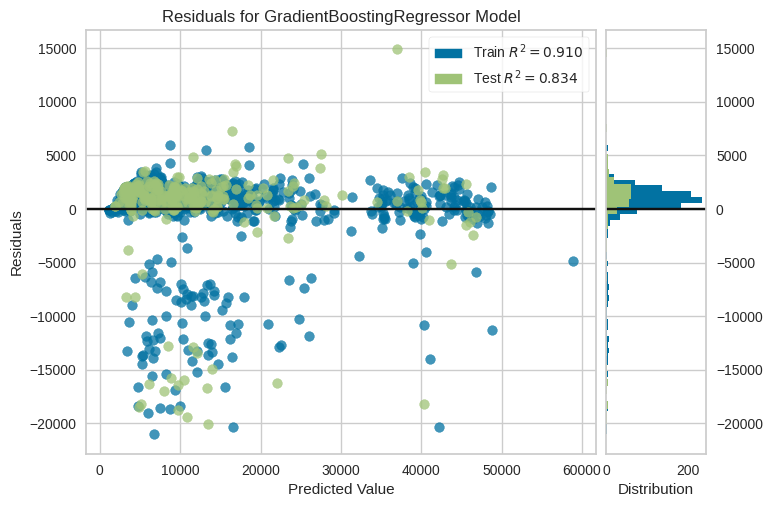

In [ ]:
plot_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

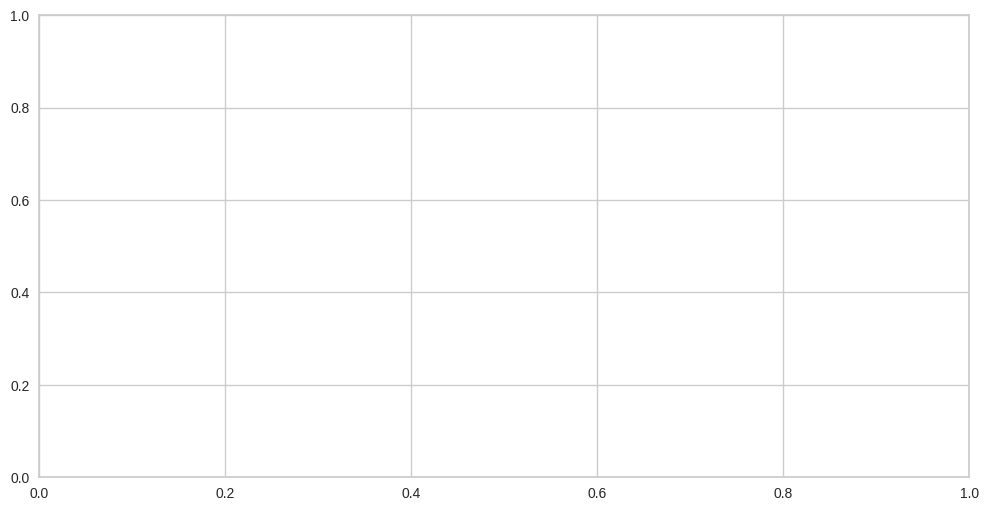

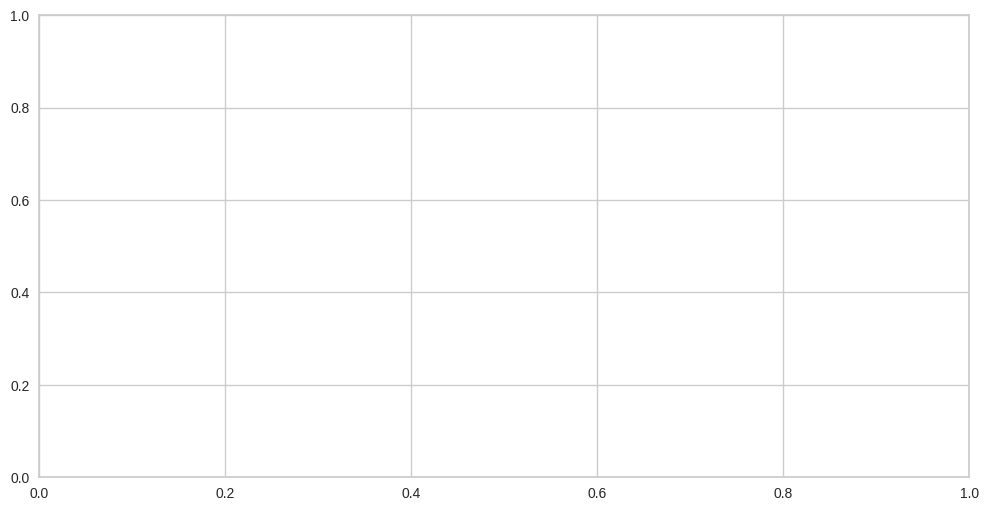

In [ ]:
evaluate_model(best_tune)